# Basic TripInfo Data Analysis
This notebook plots some basic statistics from the tripinfo simulation output.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The output xml data needs to be converted to csv using the SUMO command line tool `xml2csv.py`, which is found in the `<SUMO_HOME>\tools\xml` directory.

In [2]:
data = pd.read_csv("../scenarios/aquidneck_island_traffic_model/output/ai15_run0/ai_simulation_tripinfo.csv", sep=';')

C:\Users\paulo\AppData\Local\Temp\ipykernel_3252\3681986573.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../scenarios/aquidneck_island_traffic_model/output/ai15_run0/ai_simulation_tripinfo.csv", sep=';')


In [3]:
data.head()

,tripinfo_arrival,tripinfo_arrivalLane,tripinfo_arrivalPos,tripinfo_arrivalPosLat,tripinfo_arrivalSpeed,tripinfo_depart,tripinfo_departDelay,tripinfo_departLane,tripinfo_departPos,tripinfo_departPosLat,...,tripinfo_id,tripinfo_rerouteNo,tripinfo_routeLength,tripinfo_speedFactor,tripinfo_stopTime,tripinfo_timeLoss,tripinfo_vType,tripinfo_vaporized,tripinfo_waitingCount,tripinfo_waitingTime
0,105.0,-19361060#2_0,0.20,0.01,9.95,13.0,0.20,19351696#10_0,5.1,0.0,...,hbnw654,0,907.66,1.20,0.0,23.69,hbnwCar,NaN,3,3.0
1,120.0,19358286#1_0,58.83,-0.02,10.64,39.0,0.88,-19358563#2_1,5.1,0.0,...,hbnw614,0,768.21,1.05,0.0,13.69,hbnwCar,NaN,1,1.0
2,150.0,19359787#2_1,81.71,-0.04,9.28,120.0,0.29,-19355081#0_1,5.1,0.0,...,hbnw725,0,233.99,0.91,0.0,6.83,hbnwCar,NaN,1,1.0
3,168.0,-19348908#2_0,494.97,-0.12,10.89,29.0,0.61,-19360413#0_0,5.1,0.0,...,hbnw283,0,1556.70,1.05,0.0,26.77,hbnwCar,NaN,2,7.0
4,170.0,19356062#2_0,164.17,0.04,11.52,34.0,0.79,19356535#1_0,5.1,0.0,...,nhb880,0,1361.92,1.07,0.0,19.62,nhbCar,NaN,0,0.0


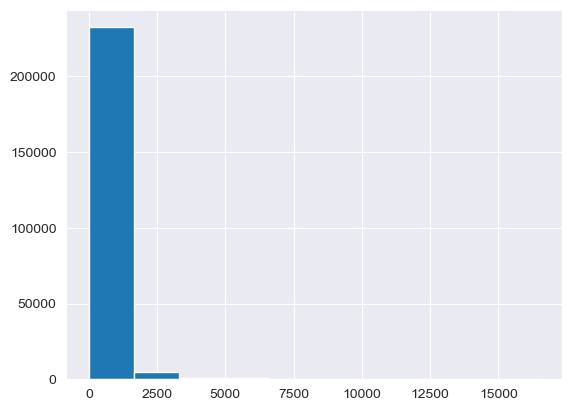

In [4]:
data.tripinfo_timeLoss.hist()
plt.show()

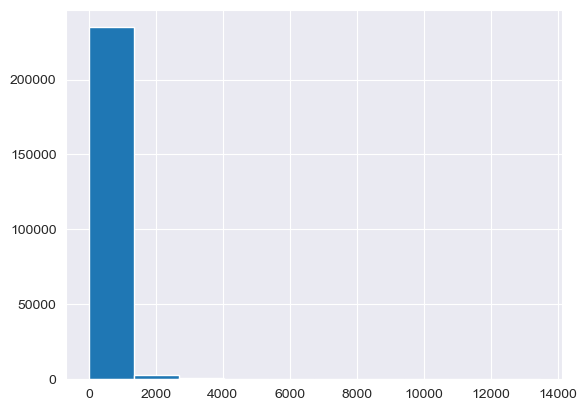

In [5]:
data.tripinfo_waitingTime.hist()
plt.show()

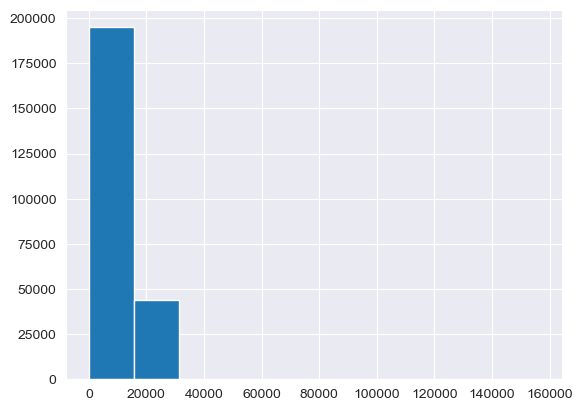

In [6]:
data.tripinfo_routeLength.hist()
plt.show()

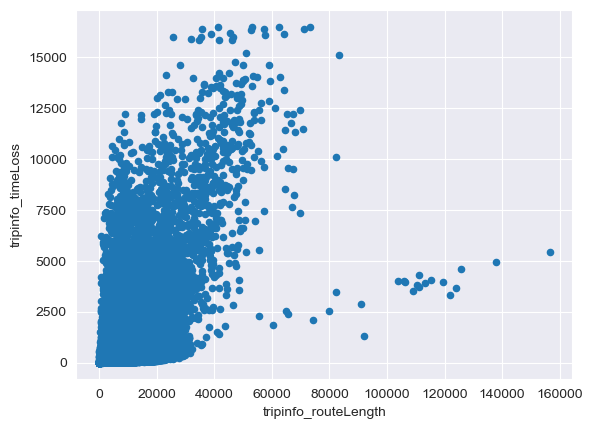

In [7]:
data.plot.scatter(x='tripinfo_routeLength',y='tripinfo_timeLoss')
plt.show()

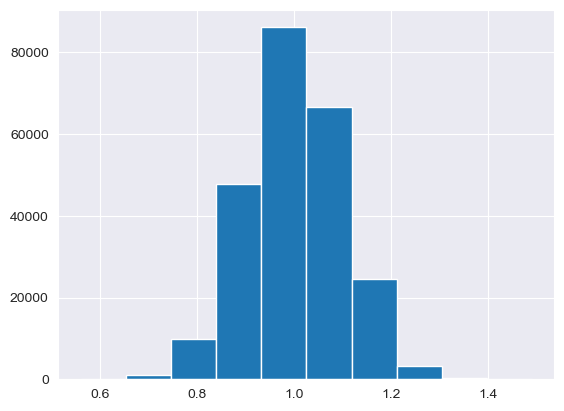

In [8]:
data.tripinfo_speedFactor.hist()
plt.show()

<Axes: xlabel='tripinfo_depart'>

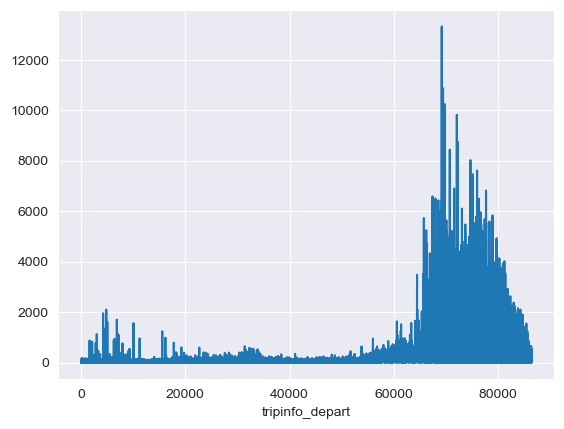

In [9]:
data.groupby('tripinfo_depart')['tripinfo_waitingTime'].mean().plot()

In [10]:
files = ['hbnwauto15', 'hbwauto15', 'nhbauto15','truck15']
od15 = pd.DataFrame()
for file in files:
    fstring = '../demand/od_data/aitm_baseline/%s.txt' % file
    od = pd.read_csv(fstring,delim_whitespace=True, skiprows=5, index_col=[0,1])
    od = pd.concat([od], keys=[file], names=['Demand'])
    od15 = pd.concat([od, od15])

In [11]:
od15.head()

Factor
Demand  *To From          
truck15 1   1     0.000000
            2     0.000000
            3     0.000000
            572   0.000003
            573   0.000005

In [12]:
od15.unstack()

Factor                                              \
From                  1          2          3          572        573   
Demand     *To                                                          
hbnwauto15 1     0.000000   0.000000   0.000000  14.589667  17.453703   
           2     0.000000   0.000000   0.000000  46.970856  51.307682   
           3     0.000000   0.000000   0.000000  86.243637  73.997406   
           572  14.589667  46.970856  86.243637   4.627839   1.626239   
           573  17.453703  51.307682  73.997406   1.626239   4.158597   
...                   ...        ...        ...        ...        ...   
truck15    650   0.692547   0.000038   0.000542   0.000000   0.000000   
           651   4.578075   0.000000   0.000000   0.000000   0.000000   
           652   2.064031   0.000013   0.000000   0.000000   0.000000   
           653   1.183946   0.615350   8.174963   0.000000   0.000000   
           654   9.980989   1.053230  10.217455   0.000626   0.000917   

                                                                         ...  \
From                   574         575        576        577        578  ...   
Demand     *To                                                           ...   
hbnwauto15 1     34.173504   35.797653  11.666042  15.293437   9.018435  ...   
           2    100.163231  107.884323  37.039680  47.776390  27.895563  ...   
           3    154.925766  116.586731  55.357197  70.533676  42.076054  ...   
           572    3.816854    1.415748   0.883370   1.030278   0.630810  ...   
           573    2.752510    1.242434   0.924056   0.986545   0.689479  ...   
...                    ...         ...        ...        ...        ...  ...   
truck15    650    0.000000    0.000287   0.000000   0.000000   0.000000  ...   
           651    0.000000    0.000000   0.000000   0.000000   0.000000  ...   
           652    0.000000    0.000000   0.000000   0.000000   0.000000  ...   
           653    0.002859    4.178336   0.000000   0.000000   0.000000  ...   
           654    0.002097    3.090968   0.000662   0.044204   0.707274  ...   

                                                                          \
From                  645        646         647         648         649   
Demand     *To                                                             
hbnwauto15 1    10.628057  50.481316   91.850975  565.530518  112.974487   
           2     5.239522  25.667576   51.073826  304.836517   59.265953   
           3     8.174809  42.044834   89.235062  537.354065  100.755219   
           572   0.040069   0.195773    0.342947    2.117536    0.425732   
           573   0.053037   0.298941    0.698131    4.294299    0.760860   
...                   ...        ...         ...         ...         ...   
truck15    650   0.000422   0.002821    0.009915    0.010727    0.005790   
           651   0.059957   0.404071  333.381531    3.664464    0.832269   
           652   0.041155   0.283744  232.359924    2.629944    0.588495   
           653   0.000653   0.004250    0.014850    0.015720    0.008650   
           654   0.004998   0.031813    0.100330    0.115881    0.064284   

                                                                         
From                  650        651         652        653         654  
Demand     *To                                                           
hbnwauto15 1    62.278393  88.514145  135.061722  98.310905  423.252991  
           2    30.258711  45.784084   69.090714  53.193062  123.826782  
           3    51.274612  80.046356  120.878288  91.946053  395.645203  
           572   0.227913   0.313490    0.493199   0.386668    1.610463  
           573   0.390613   0.630886    0.958003   0.733935    3.308471  
...                   ...        ...         ...        ...         ...  
truck15    650   3.508415   5.810866    1.397945   1.555076   13.187181  
           651   7.889084   9.024908    4.701026   7.200058   64.24885

<Axes: xlabel='None-From', ylabel='Demand-*To'>

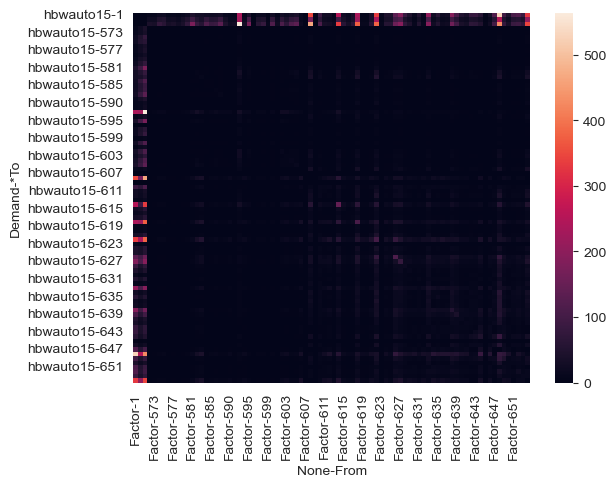

In [13]:
sns.heatmap(od15.groupby('Demand').get_group('hbwauto15').unstack())

<Axes: xlabel='*To'>

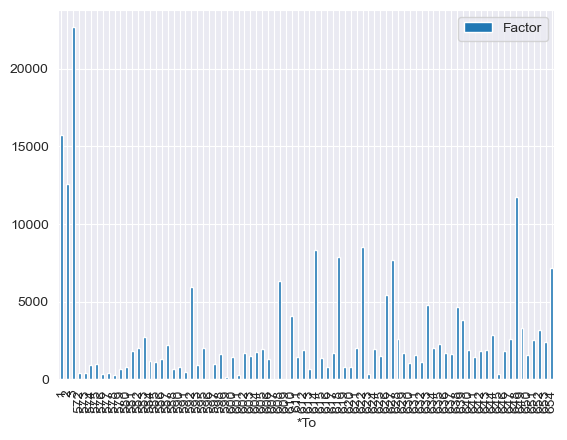

In [35]:
od15.groupby('*To').sum().plot.bar()

<Axes: xlabel='From'>

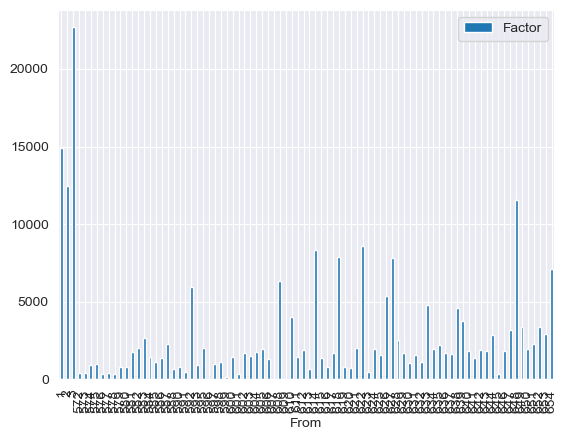

In [36]:
od15.groupby('From').sum().plot.bar()

Export the total flows across all demand modes in and out of each taz

In [39]:
od15.groupby('*To').sum().to_csv('../demand/od_data/aitm_baseline/od15_to.csv')
od15.groupby('From').sum().to_csv('../demand/od_data/aitm_baseline/od15_from.csv')